In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import floor
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df=df.drop(['PassengerId'],axis='columns')


In [4]:
df=df.drop(['Name','Parch'],axis='columns')


In [5]:
df=df.drop(['Ticket','Cabin','Embarked','SibSp'],axis='columns')
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
X = df.drop(['Survived'],axis='columns')
y= df['Survived']

In [7]:
dummy=pd.get_dummies(df.Sex).astype(int)
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [8]:
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [9]:
X =pd.concat([X,dummy],axis="columns")

In [10]:
X.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [11]:
X=X.drop(['Sex','female'],axis='columns')

In [12]:
X

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [13]:
X=X.fillna(floor(X['Age'].mean()))
nan_count = X['Age'].isna().sum()
nan_count

0

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
model.score(X_test,y_test)

0.7430167597765364

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_test,y_test)

0.7932960893854749

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))

In [21]:
cm

array([[101,  13],
       [ 24,  41]], dtype=int64)

Text(0.5, 1.0, 'HeatMap')

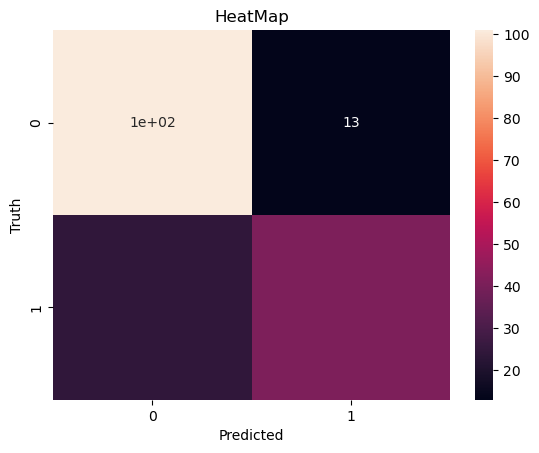

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("HeatMap")

In [25]:
y_test.shape

(179,)